In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time
import rebound
import matplotlib.pyplot as plt
import numpy as np
import eccentricWH_bruteforce
import integrator_tools

%matplotlib inline

# configuring plots
#plt.rc('text', usetex=True)            # use LaTeX for text
plt.rc('font', family='serif')          # use serif font
plt.rcParams.update({'font.size': 14})  # increase font size

In [4]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
#p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
#p1 = np.array([-2., 0., 0., 0., -0.7, 0., 2.])
#p2 = np.array([0., 60., 0.01, -0.095, 0.0, 0.01, 0.9])

p0 = np.array([0., 0., 0., 0., 0., 0., 1.25])
p1 = np.array([1., 0., 0., 0., 1., 0., 1e-3])

sim_jacobi = np.stack([p0, p1])
masses = sim_jacobi[:,-1]

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
sim_jacobi = integrator_tools.inertial_to_jacobi(sim)

# Calculate value of non-time-transformed Hamiltonian at time 0
r0_x, r0_y, r0_z = sim[0,:3]
r1_x, r1_y, r1_z = sim[1,:3]
r2_x, r2_y, r2_z = sim[2,:3]
ra = np.sqrt((r2_x-r0_x)**2 + (r2_y-r0_y)**2 + (r2_z-r0_z)**2)
rb = np.sqrt((r2_x-r1_x)**2 + (r2_y-r1_y)**2 + (r2_z-r1_z)**2)
m1, m2, m3 = sim[:3,6]

# Norm of Jacobi coordinates
r1 = np.sqrt(sim_jacobi[1,0]**2 + sim_jacobi[1,1]**2 + sim_jacobi[1,2]**2)
r2 = np.sqrt(sim_jacobi[2,0]**2 + sim_jacobi[2,1]**2 + sim_jacobi[2,2]**2)

# Jacobi momentum squared
p1_squared = sim_jacobi[1,3]**2 + sim_jacobi[1,4]**2 + sim_jacobi[1,5]**2
p2_squared = sim_jacobi[2,3]**2 + sim_jacobi[2,4]**2 + sim_jacobi[2,5]**2

m1, m2, m3 = sim[:3,6]
mu1 = m1*m2 / (m1 + m2)
mu2 = m3 * (m1 + m2) / (m1 + m2 + m3)

Kepler_term1 = p1_squared/(2*mu1) - m1*m2/r1
Kepler_term2 = p2_squared/(2*mu2) - m3*(m1+m2)/r2
perturbing_function = m3*(m1+m2)/r2 - m1*m3/ra - m2*m3/rb
p0 = - ( Kepler_term1 + Kepler_term2 + perturbing_function )

# Time transform parameters
A1, A2 = 1., 15.

N_orbits = 100
steps_per_orbit = 100
timestep = 1./steps_per_orbit * 2*np.pi
N_steps = N_orbits*steps_per_orbit

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    #print(i)
    # drift
    sim_jacobi = eccentricWH_bruteforce.drift(sim_jacobi, sim, A1, A2, p0, h=timestep)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
    
    # kick
    #sim_jacobi = eccentricWH_bruteforce.kick(sim_jacobi, sim, A1, A2, h=timestep)
    
    # drift
    #sim_jacobi = eccentricWH_bruteforce.drift(sim_jacobi, sim, A1, A2, p0, h=timestep/2)
    #sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

4.740133146834388
4.740133146834388
Period = 4.740133146834388
time to integrate = 3.5 s


In [7]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
#p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
#p1 = np.array([-2., 0., 0., 0., -0.7, 0., 2.])
#p2 = np.array([0., 60., 0.01, -0.095, 0.0, 0.01, 0.9])

p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
p1 = np.array([1., 0., 0., 0., 1., 0., 1e-9])
p2 = np.array([2., 0., 0., 0., 0.7, 0., 1e-9])

sim_jacobi = np.stack([p0, p1, p2])
masses = sim_jacobi[:,-1]

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

# Calculate value of non-time-transformed Hamiltonian at time 0
r0_x, r0_y, r0_z = sim[0,:3]
r1_x, r1_y, r1_z = sim[1,:3]
r2_x, r2_y, r2_z = sim[2,:3]
ra = np.sqrt((r2_x-r0_x)**2 + (r2_y-r0_y)**2 + (r2_z-r0_z)**2)
rb = np.sqrt((r2_x-r1_x)**2 + (r2_y-r1_y)**2 + (r2_z-r1_z)**2)
m1, m2, m3 = sim[:3,6]

# Norm of Jacobi coordinates
r1 = np.sqrt(sim_jacobi[1,0]**2 + sim_jacobi[1,1]**2 + sim_jacobi[1,2]**2)
r2 = np.sqrt(sim_jacobi[2,0]**2 + sim_jacobi[2,1]**2 + sim_jacobi[2,2]**2)

# Jacobi momentum squared
p1_squared = sim_jacobi[1,3]**2 + sim_jacobi[1,4]**2 + sim_jacobi[1,5]**2
p2_squared = sim_jacobi[2,3]**2 + sim_jacobi[2,4]**2 + sim_jacobi[2,5]**2

m1, m2, m3 = sim[:3,6]
mu1 = m1*m2 / (m1 + m2)
mu2 = m3 * (m1 + m2) / (m1 + m2 + m3)

Kepler_term1 = p1_squared/(2*mu1) - m1*m2/r1
Kepler_term2 = p2_squared/(2*mu2) - m3*(m1+m2)/r2
perturbing_function = m3*(m1+m2)/r2 - m1*m3/ra - m2*m3/rb
p0 = - ( Kepler_term1 + Kepler_term2 + perturbing_function )

# Time transform parameters
A1, A2 = 1., 15.

P_1195 = 2*np.pi*np.sqrt(1.195219123505976**3 / 3)
print(P_1195)

#P_1195 = 4.73

print(P_1195)
print('Period =', P_1195)

timestep = 1./30. * P_1195
N_steps = 100

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    #print(i)
    # drift
    sim_jacobi = eccentricWH_bruteforce.drift(sim_jacobi, sim, A1, A2, p0, h=timestep)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
    
    # kick
    #sim_jacobi = eccentricWH_bruteforce.kick(sim_jacobi, sim, A1, A2, h=timestep)
    
    # drift
    #sim_jacobi = eccentricWH_bruteforce.drift(sim_jacobi, sim, A1, A2, p0, h=timestep/2)
    #sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

4.740133146834388
4.740133146834388
Period = 4.740133146834388


/home/michaelpoon/anaconda3/envs/AST1500/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


time to integrate = 1.8 s


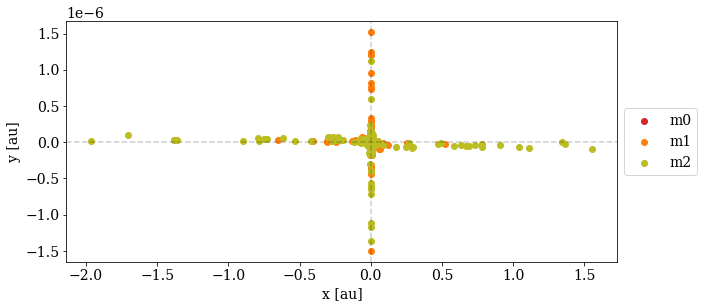

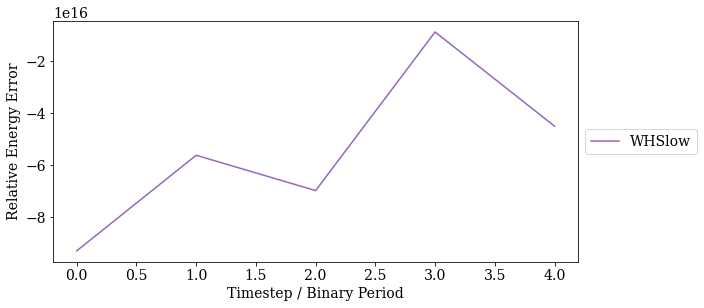

In [8]:
plt.figure(figsize=(10,4.5))
plt.scatter(orbit_soln[0,0], orbit_soln[0,1], label='m0', c='tab:red')
plt.scatter(orbit_soln[1,0], orbit_soln[1,1], label='m1', c='tab:orange')
plt.scatter(orbit_soln[2,0], orbit_soln[2,1], label='m2', c='tab:olive')

plt.axhline(0, ls='--', alpha=0.2, c='black')
plt.axvline(0, ls='--', alpha=0.2, c='black')
#plt.axis('scaled')
#plt.xlim(-50,50)
#plt.ylim(-10,90)
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(energy_error[:5], label='WHSlow', c='tab:purple')
#plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('Timestep / Binary Period')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()


In [94]:
energy_error[:5]

array([-0.00019396, -0.00038794, -0.00058194, -0.00077595, -0.00096999])